<a href="https://colab.research.google.com/github/ScriptsRemote/SCRIPTSREMOTE/blob/main/2_An%C3%A1lises_Geoespaciais_utilizando_Python_e_GEE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='orange'><b><font size='6'>Análises Geoespaciais utilizando Pythone e GEE</font></b></font>

* Vamos trabalhar com composição de bandas
* Vamos calcular o NDVI
* Vamos utilizar funções
* Vamos fazer uma análise de série temporal


<font color='orange'><b><font size='5'>Como utilizar o GEE?</font></b></font>

In [ ]:
##Precisamos instalar as bibliotecas que permitirão
## nosso acesso as servidores do Earth Engine.

##para instalar vamos usar o comando pip
!pip install earthengine-api -q
!pip install geemap -q

In [2]:
###Após instalar nossas bibliotecas
###Precisar importar para nosso ambiente
import ee 
import geemap

<font color='orange'><b><font size='5'>Tudo certo, posso começar?</font></b></font>

Não, ainda não!

Você precisa realizar autenticação de sua conta GEE.

In [ ]:
###Autenticação 
ee.Authenticate()
ee.Initialize()

<font color='orange'><b><font size='5'>Vamos abrir nossa coleção de imagens e selecionar a imagem com menor percentual de nuvem?</font></b></font>

* Vamos acessar uma base de dados [Clique aqui]( https://developers.google.com/earth-engine/datasets)
* Vamos aprender com aplicar filtros a uma coleção de imagens
* Vamos analisar as informações

In [ ]:
##Vamos selecionar uma base de dados
##Acesse este link -> https://developers.google.com/earth-engine/datasets/

##Definindo nossa região
ponto = ee.Geometry.Point([-47.608357195575195, -16.767451754807453])

##Definindo nossa variável 
collection =ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")\
                      .filterBounds(ponto)\
                      .filterDate('2021-01-01','2023-01-01')

##Vamos visualizar essa coleção
Map = geemap.Map(location=(-16.76,-47.60), zoom=10)
##Adicionando o Layer
Map.addLayer(collection)
##Visualizar o map
Map

In [ ]:
##Vamos realizar a composição das bandas 
Map = geemap.Map(location=(-16.76,-47.60), zoom=10)
##Adicionando o Layer
Map.addLayer(collection, {'bands':['B4','B3','B2'],'min':100, 'max':2000},'S2 RGB')
##Visualizar o map
Map

<font color='orange'><b><font size='5'>Nossa coleção de imagens tem muitas nuvens, vamos aprender como filtrar?</font></b></font>

In [ ]:
##Primeiro vamos comprender o número de imagens que temos 
print('Quantas imagens temos?', collection.size().getInfo())

In [ ]:
##Agora vamos verificar as propriedades da imagem
print('Acessando os metadados', collection.first().propertyNames().getInfo())

In [ ]:
##Agora sabemos que existe uma propriedade 
##Que permite filtrar imagens pelo CLOUDY_PIXEL_PERCENTAGE
collection = collection.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',1))
print('Quantas imagens temos pós filtro?', collection.size().getInfo())

In [ ]:
##Como seleciono a imagem com menor percentual de nuvens?
img = collection.sort('CLOUDY_PIXEL_PERCENTAGE').first()
##Visualizando informações sobre nossa imagem
img

In [ ]:
#Extraindo informações para nosso relatório
print('Qual o % de nuvens?', img.get('CLOUDY_PIXEL_PERCENTAGE').getInfo())
print('Qual o ID?', img.get('PRODUCT_ID').getInfo())
print('Qual a Data?', img.date().format('YYYY-MM-dd').getInfo())

In [125]:
##Vamos visualizar nossa imagem
Map = geemap.Map(location=(-16.76,-47.60), zoom=10)
##Adicionando o Layer
Map.addLayer(img, {'bands':['B4','B3','B2'],'min':100, 'max':2000},'S2 RGB')
##Visualizar o map
Map

Map(center=[-16.76, -47.6], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childr…

<font color='orange'><b><font size='5'>Vamos trabalhar com diferentes composições?</font></b></font>

Usamos composições de bandas para realçar determinadas características que a partir da reorganização das bandas nos canais RGB se apresentam de maneira distintas.

* Cor verdadeira - Representa as cores da maneira que nossos olhos costumam ver. Composta por Red, Green e Blue;

* Infravermelho - Permite identificar diferentes o estado da vegetação. Nir (infravermelho próximo), Red e Green. A banda do Infravermelho próximo reflete a clorofila, permintindo realçar áreas vegetadas.

* Agricultura: Esta composição permite monitorar a saúde das plantações, pois as bandas do infravermelho de ondas curtas e do infravermelho destacam a vegetação densa que aparece como verde vivo.SWIR 1,Nir, Blue

In [124]:
##Vamos visualizar nossa imagem
Map = geemap.Map(location=(-16.76,-47.60), zoom=10)
##Adicionando o Layer
Map.addLayer(img, {'bands':['B4','B3','B2'],'min':50, 'max':3650},'S2 RGB')
Map.addLayer(img, {'bands':['B8','B4','B3'],'min':50, 'max':3650},'S2 NRG')
Map.addLayer(img, {'bands':['B11','B8','B2'],'min':50, 'max':3650},'S2 SNB')
##Visualizar o map
Map

Map(center=[-16.76, -47.6], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childr…

<font color='orange'><b><font size='5'>Como recortar essa imagem pelo shp?</font></b></font>

* Vamos instalar o geopandas e converter nosso shp para json

In [ ]:
##Instalando biliotecas
!pip install geopandas descartes -q

In [31]:
##Importando as bibliotecas necessárias
import geopandas as gpd
import json
import pandas as pd

In [ ]:
###Abindo uma shp do nosso drive
gdf = gpd.read_file('/content/drive/MyDrive/BASES/BR_Municipios_2021.shp')
gdf.head()

In [ ]:
##Filtrando o município de interesse
municipio = gdf[gdf.NM_MUN=='Cristalina']
municipio

In [ ]:
##Convertendo para Json e depois definindo a feature
shp_to_json = municipio.to_json()
##Carregando o arquivo json
roi = json.loads(shp_to_json)
##selecionando as features
roi = roi['features']
##Verificando o processo
roi

In [ ]:
##Após converter o arquivo como Json e carregar, podemos usar
##Como uma feature e realizar nossas análises
region = ee.FeatureCollection(roi)
region

In [126]:
##Recortando nossa imagem pelo limite do município
img_clip = img.clip(region)
##Vamos visualizar nossa imagem
Map = geemap.Map(location=(-16.76,-47.60), zoom=10)
##Adicionando o Layer
Map.addLayer(img_clip, {'bands':['B4','B3','B2'],'min':50, 'max':3650},'S2 RGB')
Map.addLayer(img_clip, {'bands':['B8','B4','B3'],'min':50, 'max':3650},'S2 NRG')
Map.addLayer(img_clip, {'bands':['B11','B8','B2'],'min':50, 'max':3650},'S2 SNB')
##Visualizar o map
Map

Map(center=[-16.76, -47.6], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childr…

<font color='orange'><b><font size='5'>Como calcular o NDVI?</font></b></font>

* Índices auxiliam a compreender comportamentos espectrais asspciados a determinadas bandas.
Com base nas respostas das assinaturas espectrais, conseguimos realizar normalizações ou 
expressões matemáticas para deliniamento de cursos de água, vegetação ou outras feições.

* As primeiras ferramentas baseadas no índice de vegetação de diferença normalizada (NDVI) foram desenvolvidas na década de 1970 ( Rouse et al., 1973 )

* O Índice de Vegetação por Diferença Normalizada (NDVI) permite quantificar a vegetação medindo a diferença entre o infravermelho próximo (que a vegetação reflete fortemente) e a luz vermelha (que a vegetação absorve).

* Equação NDVI=NIR-Red/NIR+Red


In [127]:
##Primeiro precisamos criar nossa normalização 
ndvi = img_clip.normalizedDifference(['B8','B4']).rename('NDVI') ## na agricultura, os agricultores usam o NDVI para agricultura de precisão e para medir a biomassa.

##Vamos visualizar nossa imagem
Map = geemap.Map(location=(-16.76,-47.60), zoom=10)
##Adicionando o Layer
Map.addLayer(img_clip,{'bands':['B4','B3','B2'],'min':50, 'max':3650},'S2 RGB')
##Visualizar o NDVI
Map.addLayer(ndvi,{'palette':['red','yellow','green'],'min':0, 'max':1},'S2 NDVI')
##Visualizar o map
Map

Map(center=[-16.76, -47.6], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childr…

<font color='orange'><b><font size='5'>Criando Funções e Séries temporais?</font></b></font>

* As funções e o map são dois elementos fundamentais que ajudam os usuários a processar e analisar esses dados.

* Em Python, funções são blocos de código que realizam uma tarefa específica e podem ser reutilizadas em diferentes partes do programa. 

* Elas são definidas usando a palavra-chave def, seguida do nome da função, uma lista de parâmetros (entre parênteses) e dois pontos. O bloco de código da função é definido com indentação. As funções são usadas para simplificar tarefas complexas, reduzir a redundância do código e tornar o código mais organizado e legível.

* Por exemplo, existem funções para calcular índices de vegetação, somar valores de pixel, executar análises de séries temporais e muito mais.

* O método map() é uma das funções mais importantes do Google Earth Engine. Ele permite a aplicação de uma função a todos os elementos de uma coleção de dados. Por exemplo, é possível usar o método map() para aplicar uma função que calcule o índice de vegetação de diferença normalizada (NDVI) a uma coleção de imagens de satélite, gerando um mapa que mostra a vegetação em uma determinada região.


In [86]:
##Função do Fator de escala e inserir a propriedade data
def scale(image):
  return image.multiply(0.0001)\
               .clip(region)\
               .copyProperties(image, image.propertyNames())\
               .set('date', image.date().format('YYYY-MM-dd'))

##Função para calcular o ndvi
def ndvi_calc(image):
  ndvi = image.normalizedDifference(['B8','B4']).rename('NDVI')
  return image.addBands(ndvi)

In [ ]:
##Agora podemos aplicar as funções na nossa coleção
ndvi_collection = collection.map(scale).map(ndvi_calc)
print(ndvi_collection.size().getInfo())

In [ ]:
##Verificando as bandas 
ndvi_collection

<font color='orange'><b><font size='5'>Estatísticas de nossa área de estudo</font></b></font>

Nesta etapa vamos extrair as estatísticas por região (área de estudo) e gerar nosso dataframe para criar gráficos.

Para obter estatísticas de imagem em várias regiões armazenadas em um FeatureCollection, você pode usar image.reduceRegions() para reduzir várias regiões de uma vez. A entrada para reduceRegions() é uma Image e uma FeatureCollection. A saída é outra FeatureCollection com a saída reduceRegions() definida como propriedades em cada Feature. 

[fonte](https://developers.google.com/earth-engine/guides/reducers_reduce_regions)

<center>
<image src =https://developers.google.com/earth-engine/images/Reduce_region_diagram.png>
<center> Figure 1. An illustration of an ee.Reducer applied to an image and a region.

In [ ]:
##Função para converter informações da imagem em tabela
def reduce (image):

    ##Aplicando o redutor para nosssa região
    serie_reduce = image.reduceRegions(**{
                        'collection':region,
                        'reducer': ee.Reducer.mean().combine(**{
                        'reducer2': ee.Reducer.min(), 
                                    'sharedInputs': True}).combine(**{
                        'reducer2': ee.Reducer.max(),
                                    'sharedInputs': True}), 
                        'scale': 20
                        })
     
    ##Retorne a variável e adicione propriedades
    # A função lambda é uma forma de definir funções anônimas em Python, ou seja, 
    # funções sem um nome específico que podem ser definidas e usadas no mesmo lugar. 
    serie_reduce = serie_reduce.map(lambda f: f.set({'millis': image.get('millis')}))\
                                .map(lambda f: f.set({'date': image.get('date')}))         

    ##Finalize a função copiando as propriedades da imagem
    return serie_reduce.copyProperties(image, ["system:time_start"])

##Aplicando a função de redução na Coleção 
stats_table = ndvi_collection.select('NDVI').map(reduce)\
                        .flatten()\
                        .sort('date',True)\
                        .select(['NM_MUN','SIGLA','date','min','mean','max'],
                                ['NM_MUN','SIGLA','date','NDVI_min','NDVI_mean','NDVI_max'])

##Verificando os dados e as propriedades
print(stats_table.size().getInfo())
stats_table.first().propertyNames().getInfo()

In [90]:
##Convertendo os dados para tabela
# Podemos converter um FeatureCollection em um DataFrame
#  usando a função auxiliar `geemap` `ee_to_pandas`.
df = geemap.ee_to_pandas(stats_table)
df.head()

,date,NM_MUN,SIGLA,NDVI_min,NDVI_mean,NDVI_max
0,2021-04-24,Cristalina,GO,-0.936000,0.602805,0.959302
1,2021-04-24,Cristalina,GO,-0.983740,0.599242,0.973545
2,2021-05-14,Cristalina,GO,-0.680000,0.603705,0.944002
3,2021-05-14,Cristalina,GO,-0.678337,0.601363,0.942652
4,2021-06-08,Cristalina,GO,-0.886364,0.544920,0.951617


<font color='orange'><b><font size='5'>Gerando nosso gráfico</font></b></font>

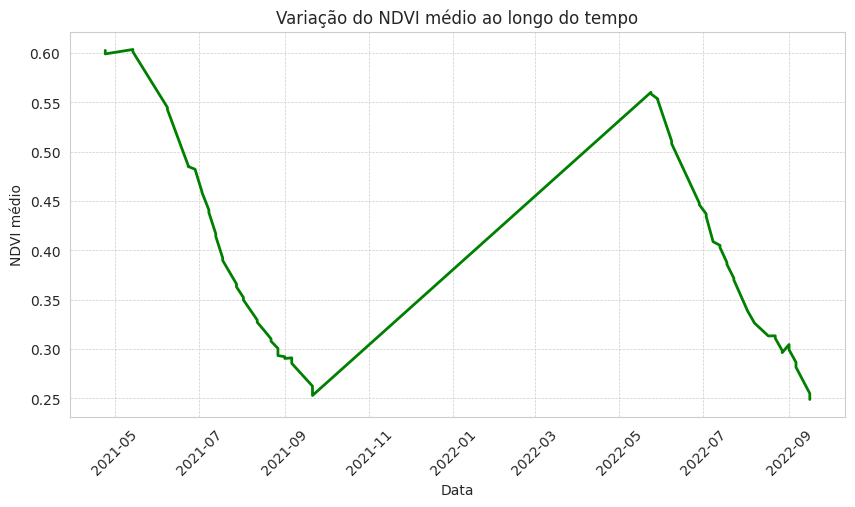

In [104]:
##Importar bibliotecas
import matplotlib.pyplot as plt

#converte a coluna "date" para o tipo datetime do Pandas.
df['date'] = pd.to_datetime(df['date'])

# A função subplots() é utilizada para criar uma figura com um único subplot.
# define o tamanho da figura do subplot e do ax
fig, ax = plt.subplots(figsize=(10, 5))  

# cria o gráfico de linha com os valores de NDVI médio em relação à data
plt.plot(df['date'], df['NDVI_mean'], color='green', linewidth=2) 

# define o rótulo do eixo x 
plt.xlabel('Data') 

# define o rótulo do eixo y
plt.ylabel('NDVI médio')

# define o título do gráfico
plt.title('Variação do NDVI médio ao longo do tempo') 

# gira os rótulos das datas para se encaixar melhor
plt.xticks(rotation=45)


# adiciona o grid
plt.grid(linestyle='--', linewidth=0.5)

# salva o gráfico em um arquivo PNG
plt.savefig('grafico_ndvi.png', dpi=300, bbox_inches='tight')


plt.show()  # exibe o gráfico


<font color='orange'><b><font size='5'>Como baixar todas as imagens?</font></b></font>

* Para realizar o download vamos usar a seguinte função

* Definir uma região de interesse (neste exemplo vamos começar com uma geometria)

* Clique aqui e acesse o Code Editor para Definir nossa geometria -> [Code Editor](https://code.earthengine.google.com/)

* Na barra de ferramentas à esquerda da tela, selecione a opção "Geometry" para criar uma nova geometria.

In [ ]:
##Função para download
download = geemap.ee_export_image_collection_to_drive(ndvi_collection.select(['NDVI']).limit(3),##Retirar o .limit(3) apenas para exemplificar
                                                      region=region.geometry(), 
                                                      folder='MINICURSO_GEE', 
                                                      scale=20,
                                                      crs='EPSG:4674', ##sirgas 2000 epsg:4674
                                                      maxPixels=1e13, 
                                                      fileFormat='GeoTIFF') #Salvará as imagens automaticamente do Drive

<font color='orange'><b><font size='5'>Criando um Timelapse</font></b></font>

In [123]:
##Pacote para baixar o vídeo 
from ee import batch 

##Criando um vídeo
def convertBit(image):
    return image.uint8() 

##Limite do Vídeo
roi = ee.Geometry.Polygon(
        [[[-47.811089281756836, -16.582980307114198],
          [-47.811089281756836, -16.961662012568745],
          [-47.38124919386621, -16.961662012568745],
          [-47.38124919386621, -16.582980307114198]]])


##Padronizando a visualização com uma função
def visualize(image):
  return image.visualize(**{'min': 0,'max': 1,'palette': ['red','yellow','green']}) ###aplicando a máscara


##chamando a conversão 
outputVideo = ndvi_collection.select('NDVI')\
                            .map(visualize)\
                            .map(convertBit)

#Export to video.
out = batch.Export.video.toDrive(outputVideo, 
                                 description='Timelapse_Cristalina', 
                                 folder= 'MINICURSO_GEE', 
                                 dimensions = 720, 
                                 framesPerSecond = 2,
                                 region=roi, 
                                 maxPixels=1e13, 
                                 maxFrames=10000)

## Processar o download para o drive
process = batch.Task.start(out)

In [122]:
##Verificando o Status do Download
out.status()

{'state': 'RUNNING',
 'description': 'Timelapse_Cristalina',
 'creation_timestamp_ms': 1683333208566,
 'update_timestamp_ms': 1683333225204,
 'start_timestamp_ms': 1683333225169,
 'task_type': 'EXPORT_VIDEO',
 'attempt': 1,
 'id': 'KRPLTTGCTO5NJUWFVWG5CB5J',
 'name': 'projects/earthengine-legacy/operations/KRPLTTGCTO5NJUWFVWG5CB5J'}